In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("path_to_file\\forestfires.csv")
data.sample(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
262,2,4,aug,fri,91.6,112.4,573.0,8.9,21.4,42,3.1,0.0,4.25


In [3]:
data_result = data["area"]
data_features = data.drop(columns=["area"])
data_features["month"].replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec'),
                               (range(0, 12)), inplace=True)
data_features["day"].replace(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], range(0, 7), inplace=True)
data_features["month"] = data_features["month"].astype('category')
data_features["day"] = data_features["day"].astype('category')
data_features.sample(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
397,5,6,7,6,91.6,181.3,613.0,7.6,24.3,33,3.6,0.0
327,6,5,8,5,92.2,102.3,751.5,8.4,21.2,32,2.2,0.0


In [4]:
data_features.dtypes

X           int64
Y           int64
month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
dtype: object

D:\anaconda_python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


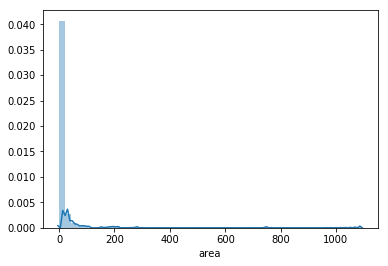

In [5]:
sea.distplot(data["area"])

D:\anaconda_python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


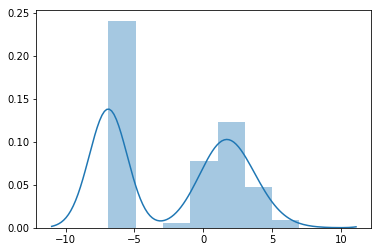

In [13]:
tmp = np.log(data_result.values + 0.001)
sea.distplot(tmp)

что-то я даже не знаю, лучше получилось или не особо

нулевые значения сильно руинят

может их дропнуть вообще)

In [14]:
svr = SVR()
ft_train, ft_test, res_train, res_test = train_test_split(data_features, data_result, random_state=13)
svr.fit(ft_train, res_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
mean_absolute_error(res_test, svr.predict(ft_test)), mean_squared_error(res_test, svr.predict(ft_test))

(9.919351748647163, 873.1186058523962)

In [16]:
params = {
    "C" : [1, 3, 40, 60, 80, 100]
}

svr_cv = GridSearchCV(svr, params)
svr_cv.fit(ft_train.values, res_train.values)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 3, 40, 60, 80, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [17]:
svr_cv.best_params_

{'C': 60}

In [18]:
mean_absolute_error(res_test, svr_cv.best_estimator_.predict(ft_test)), mean_squared_error(res_test, svr_cv.best_estimator_.predict(ft_test))

(12.51123513603212, 843.8996736204325)

In [20]:
data_result = tmp
ft_train, ft_test, res_train, res_test = train_test_split(data_features, data_result, random_state=13)
svr.fit(ft_train, res_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
params = {
    "C" : [1, 3, 40, 60, 80, 100]
}

svr_cv = GridSearchCV(svr, params)
svr_cv.fit(ft_train.values, res_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 3, 40, 60, 80, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [23]:
svr_cv.best_params_

{'C': 3}

In [24]:
mean_absolute_error(res_test, svr_cv.best_estimator_.predict(ft_test)), mean_squared_error(res_test, svr_cv.best_estimator_.predict(ft_test))

(4.379384498045883, 21.65384444437022)

чет как-то совсем не очень -_-